# Lesson: One Sample T-Test in SciPy

In [52]:
import numpy as np
from scipy.stats import ttest_1samp
import matplotlib.pyplot as plt

## 1. Introduction

In [53]:
prices = np.genfromtxt('prices.csv')

- We have provided a small dataset called `prices`, representing the purchase prices of customers to BuyPie.com in the past day.  
- First, print out `prices` to the console and examine the numbers. 
- How much variation is there in the purchase prices? Can you estimate the mean by looking at these numbers?

In [54]:
prices

array([ 978., 1080.,  999.,  855., 1105.,  961.,  899., 1061.,  880.,
       1455.,  505.,  936., 1024.,  982.,  840.,  930.,  829.,  504.,
        955., 1380., 1361., 1130.,  946.,  973., 1076., 1131.,  810.,
        734., 1275.,  867.,  962.,  865.,  709., 1216.,  735.,  768.,
        757., 1060.,  715.,  839.,  999., 1259., 1194., 1082., 1129.,
       1255.,  931., 1236.,  921.,  907.])

- Calculate the mean of prices using `np.mean()`. 
- Store it in a variable called `prices_mean` and print it out.  
- What is the average purchase price for these 50 purchases? Is it a lot less than 1000? Or only a little less?

In [55]:
prices_mean = np.mean(prices)
prices_mean

np.float64(980.0)

## 2. Implementing a One-Sample T-Test

In [56]:
prices = np.genfromtxt("prices.csv")
print(prices)

prices_mean = np.mean(prices)
print("mean of prices: " + str(prices_mean))

[ 978. 1080.  999.  855. 1105.  961.  899. 1061.  880. 1455.  505.  936.
 1024.  982.  840.  930.  829.  504.  955. 1380. 1361. 1130.  946.  973.
 1076. 1131.  810.  734. 1275.  867.  962.  865.  709. 1216.  735.  768.
  757. 1060.  715.  839.  999. 1259. 1194. 1082. 1129. 1255.  931. 1236.
  921.  907.]
mean of prices: 980.0


- Use `ttest_1samp()` to run the hypothesis test described above 
    - **null**: the average price is 1000 Rupees; 
    - **alternative**: the average price is **not** 1000 Rupees.  
- Store the p-value in a variable called `pval`. 
- Remember that it is the second output of the `ttest_1samp()` function. 
- We won’t use the first output, the t-statistic, so you can store it in a variable with whatever name you’d like.

In [57]:
_, pval = ttest_1samp(prices, 1000)

- Print out `pval` to the console.  
- Does the p-value you got make sense, knowing the mean of `prices` and having inspected the data? (Look at the hint for an answer to this question).

In [58]:
pval

np.float64(0.4920744804182786)

- P-values are probabilities, so they should be between 0 and 1. 
- This p-value is the probability of observing an average purchase price less than 980 OR more than 1020 among a sample of 50 purchases. 
- If you run the test correctly, you should see a p-value of 0.49 or 49%.
- Given that the mean purchase price in this sample was 980, which is not very far from 1000, we probably expect this p-value to be relatively large. 
- The only reason it COULD be small (eg., <.05) is if purchase prices had very little variation (eg., they were all within a few Rupees of 980). 
- We can see from the data print out that this is not the case. 
- Therefore, a p-value around 0.49 makes sense!

## 3. Assumptions of a One Sample T-Test

In [59]:
prices = np.genfromtxt("prices.csv")

- Using `plt.hist()`, plot a histogram of `prices` and check whether the values are (approximately) normally distributed. 
- Do you see anything to make you concerned that the assumptions of the test were not met (skew, bi-modality, outliers)?

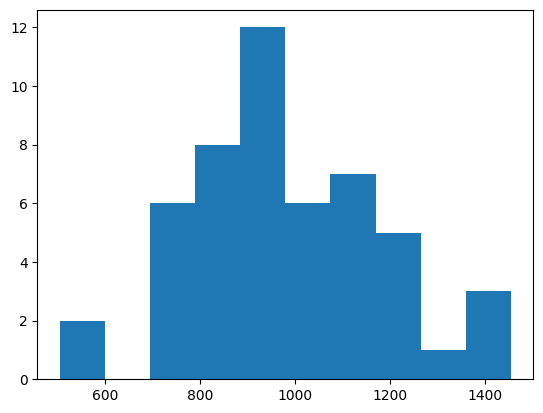

In [60]:
plt.hist(prices)
plt.show()

- There does not seem to be any clear skewness, bi-modality, or outliers. 
- The histogram is approximately normal.

## 4. Review

In [61]:
daily_prices = np.genfromtxt("daily_prices.csv", delimiter=",")

- As a final exercise, some data has been loaded for you with purchase prices for consecutive days at BuyPie. 
- You can access the first day using `daily_prices[0]`, the second using `daily_prices[1]`, etc.. 
- To practice running a one-sample t-test and inspecting the resulting p-value, try the following:

In [62]:
daily_prices[0], daily_prices[1]

(array([1353.,  760.,  900.,  759.,  854.,  925.,  839.,  917., 1236.,
         940., 1253.,  859.,  873.,  814.,  909.,  718.,  835., 1027.,
        1075.,  801.,  714.,  733., 1137., 1057., 1118., 1025.,  858.,
        1010.,  600.,  967., 1286., 1072., 1007.,  585.,  853., 1286.,
        1531.,  685.,  764., 1113.,  905.,  711.,  758.,  643.,  748.,
         965., 1102., 1239., 1354., 1265., 1046.,  995., 1230.,  822.,
        1185., 1183., 1285.,  969.,  964.,  958., 1159., 1123.,  739.,
        1076., 1712., 1241., 1337.,  852., 1075., 1274., 1023.,  862.,
         964.,  926., 1150., 1124., 1004.,  894.,  939., 1161., 1028.,
         793.,  677., 1107., 1356., 1284.,  775.,  955., 1145.,  856.,
         930.,  748., 1257., 1019., 1180., 1581., 1246.,  998., 1078.,
        1104.]),
 array([ 831.,  993.,  922.,  559., 1086., 1119.,  787., 1374., 1100.,
        1097., 1066., 1010.,  958., 1272.,  876., 1267.,  929., 1441.,
        1072., 1176., 1166., 1086., 1221.,  818., 1312.,  84

- Calculate and print out a p-value for day 1 where the null hypothesis is that the average purchase price was 1000 Rupees and the alternative hypothesis is that the average purchase price was not 1000 Rupees. 
- Print out the p-value.

In [63]:
_, pval = ttest_1samp(daily_prices[0], 1000)
pval

np.float64(0.6071186852381733)

- Run the same hypothesis tests for days 1-10 (the fastest way to do this is with a for-loop!) and print out the resulting p-values. 
- What’s the smallest p-value you observe for those 10 days?

In [64]:
pvals = []
for i in range(0, 10):
    _, pval = ttest_1samp(daily_prices[i], 1000)
    pvals.append(pval)
    print(f"Day {i+1}: P-value = {pval}")

print(f"Min-P-value = {min(pvals)} at day {pvals.index(min(pvals))+1}")

Day 1: P-value = 0.6071186852381733
Day 2: P-value = 0.4093623236367092
Day 3: P-value = 0.6823152912621232
Day 4: P-value = 0.9396281562313855
Day 5: P-value = 0.8434532443692766
Day 6: P-value = 0.018765443076610086
Day 7: P-value = 0.6240646986588566
Day 8: P-value = 0.8594296361029083
Day 9: P-value = 0.774383958509746
Day 10: P-value = 0.6813407662727201
Min-P-value = 0.018765443076610086 at day 6


- Try changing the null hypothesis so that the expected population mean that you’re testing against is different from 1000. 
- Try any numbers that you want. 
- How do your p-values change?

In [65]:
for i in range(10):
    _, pval = ttest_1samp(daily_prices[i], 950)
    print(f"Day {i+1}: P-value = {pval}")

Day 1: P-value = 0.006068400953830714
Day 2: P-value = 0.00248388684038805
Day 3: P-value = 0.005760623841230095
Day 4: P-value = 0.022860837090812915
Day 5: P-value = 0.02269727235522927
Day 6: P-value = 3.7291718443794065e-06
Day 7: P-value = 0.007970863097214977
Day 8: P-value = 0.05444296471985296
Day 9: P-value = 0.022347610165122662
Day 10: P-value = 0.07949349326248731
